In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

source_csv = '/home/andris/GitHub/data/user_series.csv'

In [2]:
df = pd.read_csv(source_csv)

df = df.groupby(['id','event_leg']).sum()
df = df[df['q_lvl_0_cor'] > 10]
df.head()

play_video  \
id                                                 event_leg               
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0               0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0               0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0               0.0   
                                                   2.0               0.0   
                                                   4.0               0.0   

                                                              q_lvl_0  \
id                                                 event_leg            
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0           11.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0           12.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0          100.0   
                                                   2.0            5.0   
                                                   4.0            0.0   

                                                              q_lvl_0_cor  \
id                                                 event_leg                
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0               12.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0               22.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0               83.0   
                                                   2.0               58.0   
                                                   4.0               11.0   

                                                              q_lvl_1  \
id                                                 event_leg            
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0            0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0            0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0            0.0   
                                                   2.0            0.0   
                                                   4.0            0.0   

                                                              q_lvl_1_cor  \
id                                                 event_leg                
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0                0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0                0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0                0.0   
                                                   2.0                0.0   
                                                   4.0                0.0   

                                                              q_lvl_2  \
id                                                 event_leg            
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0            0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0            0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0            0.0   
                                                   2.0            0.0   
                                                   4.0            0.0   

                                                              q_lvl_2_cor  \
id                                                 event_leg                
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0                0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0                0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0                0.0   
                                                   2.0                0.0   
                                                   4.0                0.0   

                                                              q_lvl_3  \
id                                                 event_leg            
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01... 0.0            0.0   
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d... 0.0            0.0   
0001fbafbadf796136e7b11d6d156c485a4439498d052be... 0.0            0.0   
        

In [3]:
# Checking out the churn rate of users
users = np.unique(df.index.get_level_values(0));

plot_churn = [];
for user in users:
    plot_churn.append(max(df.loc[user].index.get_level_values(0)))
    

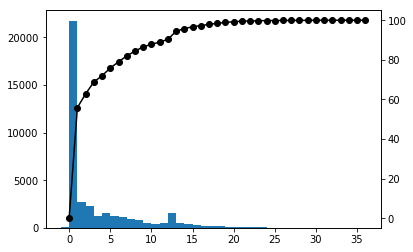

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

n, bins, patches = ax1.hist(plot_churn, int(max(plot_churn)+1))
#ax1.ylim([0, 10000])
#ax1.axis([0,35,0,10000])

ax2.plot(range(len(bins)-1),np.cumsum(n)*100/np.sum(n),'-ok')

In [5]:
df_check = df.groupby('id').sum()
df_check = df_check[df_check['q_lvl_0_cor']>10]

#df.join(df_check.set_index('id'), on='id')
#df_check = df_check.join(df,lsuffix='_caller', rsuffix='_other').shape


In [6]:
print("Number of rows is: ",df.shape[0])
print("Number of unique users", len(np.unique(df.index.get_level_values(0))))


Number of rows is:  76809
Number of unique users 39057


In [7]:
"""
A function that prepares our time series dataframe in one of 2 manners:
    - sum (for every month of desired data, simply sum the values)
    - append (for every month of desired data, add columns showing activity during that month)
    
Returns a churn dataframe that corresponds to when each user churned
"""


def prepare_time_series(df_test, month_array, type_operation):
    
    keys = np.unique(df_test.index.get_level_values(0))
    var = [];
    new_keys = [];
    churn = [];

    for key in keys:
        try:
            # Loading first month data
            user_var = df_test.loc[key].loc[month_array[0]]

            # Loading data from the other months if required
            if len(month_array) > 1:
                
                for it in range(1,len(month_array)):
                    
                    if type_operation == 'sum':
                        
                        try:
                            user_var = user_var + df_test.loc[key].loc[month_array[it]]
                        except:
                            continue
                        
                    elif type_operation == 'append':
                        try:
                            user_var_2 = df_test.loc[key].loc[month_array[it]]
                        except:
                            user_var_2 = df_test.iloc[0]*0
                
                        user_var_2 = user_var_2.rename(lambda x: x + '_'+str(month_array[it]))
                        user_var = user_var.append(user_var_2)

            churn.append(max(df_test.loc[key]['view_hint'].keys().values))
            var.append(user_var);
            new_keys.append(key)
        except:
            continue
            
    df_new = pd.DataFrame(var, index = new_keys)
    churn = pd.DataFrame(churn, index = new_keys, columns = ['event_leg'])
    return df_new, churn


In [9]:
month_array = [0]; # Months of activity to encorporate in the model
last_month = max(month_array) # Last month of activity

df_trf, churn = prepare_time_series(df, month_array, 'append')
print(df_trf.shape)
print(churn.shape)


df_trf.head()

(32945, 17)
(32945, 1)


,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,q_lvl_1_cor,q_lvl_2,q_lvl_2_cor,q_lvl_3,q_lvl_3_cor,q_lvl_4,q_lvl_4_cor,q_lvl_5,q_lvl_5_cor,q_lvl_6,q_lvl_6_cor,view_concept,view_hint
00007cec7712f365f0dc35daee6be4ba26add9bf5438a01c8db96e3255396a21,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00011e0373cefdf1a82a6ceced473cecc3390c009adef9d5e8d53922851efb65,0.0,12.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001fbafbadf796136e7b11d6d156c485a4439498d052be3157dc489a2de5605,0.0,100.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,321.0,137.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0
000962dfabfc1147034fee97c0608daff74f7808fdeed7f124491f6f6a38d810,15.0,29.0,22.0,0.0,4.0,4.0,4.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0


Number of remaining users: 32945
Number of people who have churned next month 21763
Number of people who haven't churned next month 11182


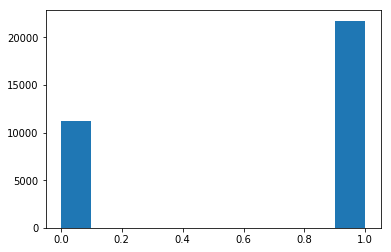

In [10]:
# Now that we have 2 months of data for each user, can we predict whether they will churn next month

# First eliminate all users that have churned before then
eliminate = churn['event_leg']>=last_month # users must have last month equal or greater than encorpoarted into data
churn = churn[eliminate]
df_trf = df_trf[eliminate]
print('Number of remaining users:',len(churn))

# Of those users, how many had a last month of activity at 1, and therefore churned next month
label = [1 if item == last_month else 0 for item in churn.values]

plt.hist(label)
print("Number of people who have churned next month", label.count(1))
print("Number of people who haven't churned next month", label.count(0))

In [11]:
# General function to test any classifier

from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import KFold, train_test_split

def test_classifier(X,y, clf_class,n_fold,**kwargs):
    
    # Construct a kfolds object
    kf = KFold(n_splits=n_fold,shuffle=True)
    y_checks = np.zeros(len(y))
    # Iterate through folds
    score = [];
    for train_index, test_index in kf.split(y):
        
        # Training classifier
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        # Predicting values and testing
        y_pred = clf.predict(X_test)
        score.append([accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),
                      recall_score(y_test,y_pred)])
        
        # Predicted values from cross-validation
        y_checks[test_index] = y_pred

    df_score = pd.DataFrame(score, columns=['Accuracy', 'Precision','Recall'])
    df_score.loc['mean'] = df_score.mean()
    
    return df_score, y_checks

In [12]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_trf.drop(['q_lvl_6_cor','q_lvl_6'],axis=1))
y = np.array(label);


In [17]:
from sklearn.dummy import DummyClassifier as DC

df_score, y_pred = test_classifier(X, y, DC, n_fold, strategy='most_frequent')
print(df_score)

      Accuracy  Precision  Recall
0     0.658977   0.658977     1.0
1     0.656549   0.656549     1.0
2     0.667476   0.667476     1.0
3     0.662923   0.662923     1.0
4     0.657004   0.657004     1.0
mean  0.660586   0.660586     1.0


      Accuracy  Precision    Recall
0     0.671574   0.703374  0.870583
1     0.675368   0.702518  0.889547
2     0.678859   0.702844  0.893593
3     0.676279   0.688378  0.916336
4     0.677037   0.702517  0.888889
mean  0.675823   0.699926  0.891789


([array([  5216.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  27729.]),
  array([ 11182.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  21763.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

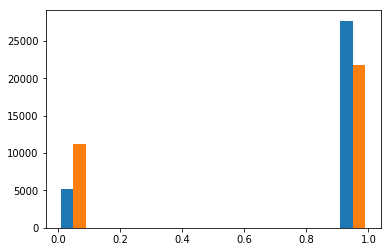

In [13]:
# Attempting to train using a neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

n_fold=5;
df_score, y_pred = test_classifier(X, y, MLPClassifier, n_fold, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, ), random_state=1)
print(df_score)

plt.hist([y_pred,y],histtype='bar')


In [193]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

def create_baseline():
    model = Sequential();
    model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Load dataset
dataset = df_trf.values
X = dataset[:,0:16].astype(float)
Y = dataset[:,16]

estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, df_trf.values, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [194]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 66.76% (0.50%)


      Accuracy  Precision    Recall
0     0.657004   0.718544  0.796854
1     0.657156   0.721992  0.791089
2     0.649264   0.710343  0.795377
3     0.641372   0.697026  0.793184
4     0.651996   0.708282  0.798844
mean  0.651358   0.711237  0.795069


([array([  8616.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  24329.]),
  array([ 11182.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  21763.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

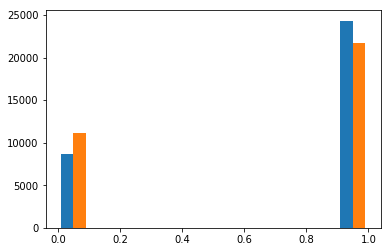

In [18]:
from sklearn.ensemble import RandomForestClassifier as RF, GradientBoostingClassifier as GB

n_fold=5;
df_score, y_pred = test_classifier(X, y, RF, n_fold, n_estimators = 100)
print(df_score)

plt.hist([y_pred,y],histtype='bar')

In [19]:
# What do the random forests think is the most important feature?

randomForest = RF(n_estimators = 100)
randomForest.fit(X,y)

importances = randomForest.feature_importances_
print(df_trf.keys())

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),df_trf.keys()[indices[f]])

Index(['play_video', 'q_lvl_0', 'q_lvl_0_cor', 'q_lvl_1', 'q_lvl_1_cor',
       'q_lvl_2', 'q_lvl_2_cor', 'q_lvl_3', 'q_lvl_3_cor', 'q_lvl_4',
       'q_lvl_4_cor', 'q_lvl_5', 'q_lvl_5_cor', 'q_lvl_6', 'q_lvl_6_cor',
       'view_concept', 'view_hint'],
      dtype='object')
Feature ranking:
1. feature 1 (0.402499) q_lvl_0
2. feature 2 (0.250371) q_lvl_0_cor
3. feature 14 (0.091938) q_lvl_6_cor
4. feature 4 (0.039572) q_lvl_1_cor
5. feature 3 (0.034044) q_lvl_1
6. feature 0 (0.031879) play_video
7. feature 13 (0.028084) q_lvl_6
8. feature 6 (0.024370) q_lvl_2_cor
9. feature 5 (0.022470) q_lvl_2
10. feature 8 (0.015897) q_lvl_3_cor
11. feature 10 (0.015881) q_lvl_4_cor
12. feature 7 (0.015405) q_lvl_3
13. feature 9 (0.014896) q_lvl_4
14. feature 11 (0.006477) q_lvl_5
15. feature 12 (0.006216) q_lvl_5_cor


      Accuracy  Precision    Recall
0     0.655512   0.701098  0.798575
1     0.653525   0.698720  0.799174
2     0.648438   0.695060  0.793782
3     0.654717   0.701093  0.803574
4     0.664229   0.710899  0.802901
mean  0.655284   0.701374  0.799601


([array([ 17195.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  45709.]),
  array([ 22811.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  40093.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 2 Lists of Patches objects>)

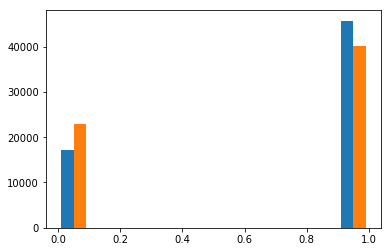

In [40]:
from sklearn.ensemble import RandomForestClassifier as RF, GradientBoostingClassifier as GB

n_fold=5;
df_score, y_pred = test_classifier(X, y, RF, n_fold, n_estimators = 100)
print(df_score)

plt.hist([y_pred,y],histtype='bar')

In [41]:
from sklearn.svm import SVC

n_fold=5;
df_score, y_pred = test_classifier(X, y, SVC, n_fold,C= 1)
print(df_score)

plt.hist([y_pred,y],histtype='bar')

KeyboardInterrupt: 